In [1]:
#SAMPLE DATA SET
import pandas as pd

pizza = {'diameter': [10, 14, 18, 22, 26],
         'harga': [7.4, 11, 14.5, 19, 21.5]}

pizza_df = pd.DataFrame(pizza)
print(pizza_df)


   diameter  harga
0        10    7.4
1        14   11.0
2        18   14.5
3        22   19.0
4        26   21.5


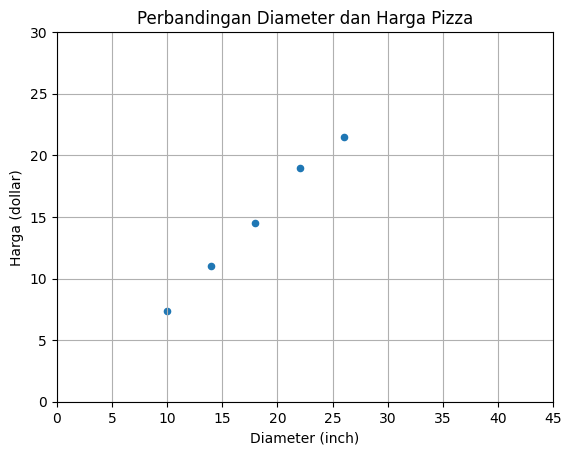

In [2]:
#VISUALISASI DATA SET
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 45)
plt.ylim(0, 30)
plt.grid(True)
plt.show()

In [3]:
#TRANSFORMASI DATA SET
import numpy as np

x = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'x: {x}')
print(f'y: {y}')

x: [10 14 18 22 26]
y: [ 7.4 11.  14.5 19.  21.5]


In [4]:
x = x.reshape(-1, 1)
x.shape

(5, 1)

In [9]:
x

array([[10],
       [14],
       [18],
       [22],
       [26]], dtype=int64)

In [10]:
#TRAINING SIMPLE LINIER REGRESSION MODEL
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [15]:
#VISUALISASI SIMPLE LINIER REGRESSION MODEL
x_vis = np.array([0, 25]).reshape(-1,1)
y_vis = model.predict(x_vis)

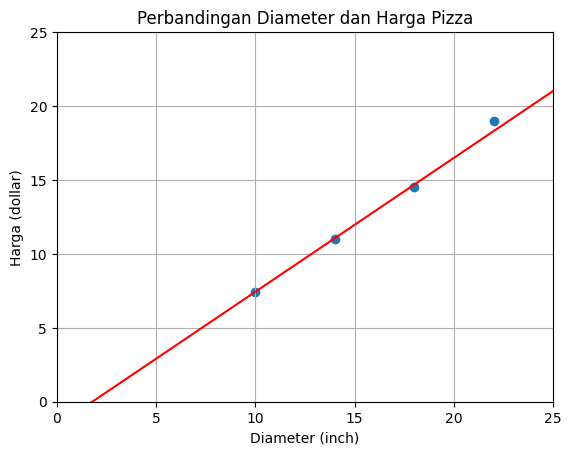

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

plt.plot(X_vis, y_vis, '-r')
plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [19]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')


intercept : -1.6099999999999977
slope : [0.905]


In [23]:
# MENCARI NILAI SLOPE
import numpy as np

print(f'x:\n{x}\n')
print(f'x flatten: {np.array(x).flatten()}\n')
print(f'y: {y}')



x:
[[10]
 [14]
 [18]
 [22]
 [26]]

x flatten: [10 14 18 22 26]

y: [ 7.4 11.  14.5 19.  21.5]


In [24]:
#VARIANCE
variance_x = np.var(x.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 40.0


In [25]:
#COVARIANCE
np.cov(x.flatten(), y)

array([[40.   , 36.2  ],
       [36.2  , 32.937]])

In [28]:
import numpy as np

x_array = np.asarray(x)
covariance_xy = np.cov(x_array.flatten(), y)[0][1]
print(f'covariance: {covariance_xy}')


covariance: 36.2


In [29]:
#SLOPE
slope = covariance_xy / variance_x

print(f'slope:{slope}')

slope:0.905


In [31]:
#MENCARI NILAI INTERCEPT
intecept = np.mean(y) - slope * np.mean(x)

print(f'intercept: {intecept}')

intercept: -1.6099999999999977


In [33]:
#PREDIKSI HARGA PIZZA
diameter_pizza = np.array([10, 15, 19]).reshape(-1, 1)
diameter_pizza

array([[10],
       [15],
       [19]])

In [34]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([ 7.44 , 11.965, 15.585])

In [35]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([ 7.44 , 11.965, 15.585])

In [37]:
#EVALUASI SIMPLE LINEAR REGRESSION MODEL
#TRAINING & TESTING DATASET

X_train = np.array([6, 8, 10, 14, 18]). reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([12, 16, 11, 9, 8]). reshape(-1, 1)
y_test = np.array([11, 18, 15, 8.5, 12])

In [38]:
# TRAINING SIMPLE LINEAR REGRESSION MODEL
model = LinearRegression() 
model.fit(X_train, y_train)


LinearRegression()

In [39]:
#EVALUASI LINIER REGRESSION MODEL DENGAN COEFFICIENT OF DETERMINATION ATAU R-SQUARED
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.5821701988385819


In [40]:
#MENCARI NILAI R-SQUARED(R2)
# MENCARI NILAI SSres
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip (X_test, y_test)])
print(f'ss_res: {ss_res}')

ss_res: 22.646375222948866


In [41]:
#SStot
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 54.2


In [42]:
#R2
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.5821701988385819
